In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/copy-of-cisc-873-dm-w23-a4/sample_submission_a3.csv
/kaggle/input/copy-of-cisc-873-dm-w23-a4/a4/train_xy.csv
/kaggle/input/copy-of-cisc-873-dm-w23-a4/a4/test_x.csv
/kaggle/input/copy-of-cisc-873-dm-w23-a4/a4/img_test/6234.jpg
/kaggle/input/copy-of-cisc-873-dm-w23-a4/a4/img_test/1269.jpg
/kaggle/input/copy-of-cisc-873-dm-w23-a4/a4/img_test/3863.jpg
/kaggle/input/copy-of-cisc-873-dm-w23-a4/a4/img_test/6241.jpg
/kaggle/input/copy-of-cisc-873-dm-w23-a4/a4/img_test/623.jpg
/kaggle/input/copy-of-cisc-873-dm-w23-a4/a4/img_test/2193.jpg
/kaggle/input/copy-of-cisc-873-dm-w23-a4/a4/img_test/3750.jpg
/kaggle/input/copy-of-cisc-873-dm-w23-a4/a4/img_test/2008.jpg
/kaggle/input/copy-of-cisc-873-dm-w23-a4/a4/img_test/5982.jpg
/kaggle/input/copy-of-cisc-873-dm-w23-a4/a4/img_test/2081.jpg
/kaggle/input/copy-of-cisc-873-dm-w23-a4/a4/img_test/6588.jpg
/kaggle/input/copy-of-cisc-873-dm-w23-a4/a4/img_test/3919.jpg
/kaggle/input/copy-of-cisc-873-dm-w23-a4/a4/img_test/6197.jpg
/kaggle/input/cop

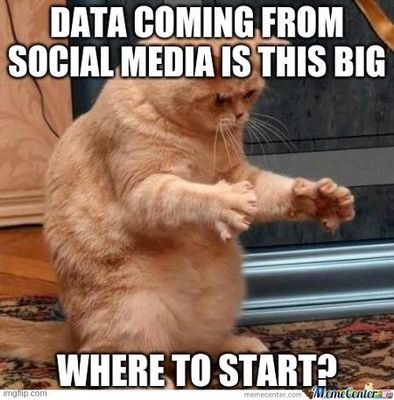

# Problem Formulation

### **Define the problem:**

- This is a multimodality task which is to estimate the price of an Airbnb listing using multi class classification based on the photo and description provided.

- The price of a new listing, as well as the type of rental being promoted, is predicted using a multi-objective method.

---

### **What is the input?**

- The data is presented in the form of text and images , there is an image and a text summary for each listing.

- The training data comprises of an image and text summary with label values for the listing's kind and price range.

---



### **What is the output?**
- Type and price range are two of the model's outputs.

---


### **What data mining function is required?**

**1-  Importing the Libraries & Loading the Data**

**2- Data exploration :** matplotlib libraries are used to plot the data.

**3- Data Preprocessing**: In this step we need to clean the data to make it ready for any type of classification model.

### **Preprocessing trial_1 :**
 1.   For image preprocessing :
  * resize the image to be (64 * 64 * 2)

 2.   For Text Preprocessing :
  * Tokenization & converting to integer IDs
  * Remove any duplicates

Not including in this notebook but it was my first submit.


### **Preprocessing trial_1 with different approach:**

1. Translate the 'summary' column to english.
2. Drop any record that can't be translated to english.

3. Remove images that can't be open.
4. Resize the image to be (64 * 64 * 2)





### **4- Models:**
1.   Model with Conv2d & Dropout layer
2.   Model with LSTM layer for text
3.   Model with GRU layer for text
4.   Model with Bi-directional Recurrent with LSTM layer
5.   Model with Bi-directional Recurrent with GRU layer
6.   Multi-objective learning.
7.   Model with Transfer Learning using **ResNet50V2** & **BERT** with TensorFlow.




**5- Predict the category for test_new.csv to be sumbitted on Kaggle**


### **What could be the challenges?**


Small image dimensions (64x64) or (128*128) may provide problems because they may not include enough detail or information to effectively anticipate pricing ranges.

And also there are different languages that we must deal with it, and there are some languages that we cannot translate. We will talk about them in detail in the preprocessing trial_2 .

### **What is the impact?**


- On any Vacation rental platforms, In the agreement between the lessor and the lessee we may want to find answers to the following questions in near real-time:


  *   Does a given piece of information contradict the other?
  *   Does a given piece of information imply the other?

So, the impact of this solution could assist improve relationships and establish confidence with consumers renting these properties by streamlining the workflow for using Airbnb as a host.


### **What is an ideal solution?**

- Airbnb hosts aren’t likely to be hospitality industry experts. For people who want to make money from their otherwise vacant properties, trying to find the right rate to charge guests involves time, research, and risk. Among their challenges:

- If hosts price the property too high, it sits vacant. If the price is set too low, they lose money. Ai model that helps set prices for hosts seems to make sense and make it easier for hosts to rent their properties.



---

### **What is the experimental protocol used and how was it carried out? How did we tune hyper-parameters in the template? What is the search space and what is the criteria to determine good/bad hyper-parameters?**

- As we mentioned earlier in the question “What is the required data extraction function”  and I also mentioned about it in each trial separately.

---

# Data Preparations

In [ ]:
# # import data from my google drive
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# importing libraries


from ast import literal_eval
import matplotlib.pyplot as plt
from time import time
from tqdm.notebook import tqdm   #progress bar


# to translate the text data
!pip install googletrans
!pip install googletrans==3.1.0a0
from googletrans import Translator
import cv2


import os # the os module provides an operating system interface from Python
import pandas as pd # pandas is used for tabular data preprocessing
from PIL import Image   #image processing
import numpy as np # used for fast mathematical operations on arrays and linear algebra operations
# from __future__ import absolute_import, division, print_function, unicode_literals
import collections


# For building the model

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer #Tokenizer library to give each word a token
from tensorflow.keras.preprocessing.sequence import pad_sequences #To convert tokenized array to a 2D array
from sklearn.model_selection import train_test_split # to make train-validation split
from pprint import pprint


# after unzipping the datset
# we find that (through the file browser on the left) there is a csv file and a
# # folder of images
# df = pd.read_csv('/content/drive/MyDrive/Dreams come true ^^/master/Data Mining/colab competition/comp 4/a4/train_xy.csv')
# df_test2 = pd.read_csv('/content/drive/MyDrive/Dreams come true ^^/master/Data Mining/colab competition/comp 4/a4/test_x.csv')
# df = pd.read_csv('/content/drive/MyDrive/Master/comp4 data mining/train_xy.csv')
# df_test2 = pd.read_csv('/content/drive/MyDrive/Master/comp4 data mining/test_x.csv')
df = pd.read_csv('/kaggle/input/copy-of-cisc-873-dm-w23-a4/a4/train_xy.csv')
df_test2 = pd.read_csv('/kaggle/input/copy-of-cisc-873-dm-w23-a4/a4/test_x.csv')
df

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 27.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 4.6 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.0.0-py3-none-any.whl size=15735 sha256=fe9576e3b81f19bb9805d6e686e7254a919c9023a87e1563616ede4a84a5980f
  Stored in directory: /root/.cache/pip/wheels/cd/15/16/9d24ab82fc6498f8150e1b478c1891e7139afc854f00b8af5d
Successfully built googletrans
  Attempting uninstall: h11
    Found existing installation: h11 0.14.0
    Uninstalling h11

,summary,image,type,price
0,"Spacious, sunny and cozy modern apartment in t...",img_train/0.jpg,Apartment,1
1,Located in one of the most vibrant and accessi...,img_train/1.jpg,Apartment,0
2,Logement coquet et douillet à 10 minutes du ce...,img_train/2.jpg,Apartment,1
3,"Beautiful and spacious (1076 sc ft, / 100 mc) ...",img_train/3.jpg,Apartment,1
4,Très grand appartement ''rustique'' et très ag...,img_train/4.jpg,Apartment,0
...,...,...,...,...
7622,"Un grand logement 4 et 1/2, tout inclut, bien ...",img_train/7626.jpg,Apartment,0
7623,Magnificent condo directly on the river. You w...,img_train/7627.jpg,Apartment,2
7624,This apartment is perfect for anyone visiting ...,img_train/7628.jpg,Apartment,1
7625,"It is a cozy ,clean ,and comfortable apartment...",img_train/7629.jpg,Apartment,0


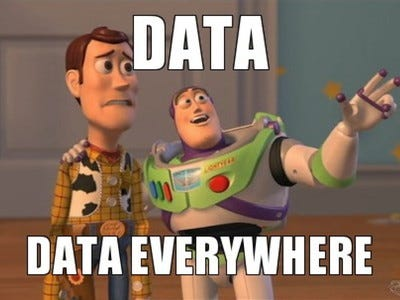

You can see that summary coloumn has many different language so that we will use google translate api to translate all corpus to english and drop the missing ones

## Translate the 'summary' column.

In my previous competition i was hoping to be able to translate my data into english.

But the data was large , the good news is that this data is less that the previous data but it takes more than two hours to translate it as well.

In [ ]:
# translate the summary column for both datasets
print('start translating the training dataset')

for i in tqdm(range(len(df))):
  # call translator api
  translator = Translator()
  # translate row by row in summary coloumn to English in training dataset
  df.at[i,'summary'] = translator.translate(df.at[i,'summary'],dest='en').text

print('Done .. \n')


print('start translating the testing dataset')

for i in tqdm(range(len(df_test2))):
  # call translator api
  translator = Translator()
  # translate row by row in summary coloumn to English in testing dataset
  df_test2.at[i,'summary'] = translator.translate(df_test2.at[i,'summary'],dest='en').text

print('Done .. \n')


#print the unique numbers

# get the length of summary column
print(len(df['summary']))
# get the length of image column
print(len(df['image']))
# get the length of type column
print(len(df['type']))
# get the length of price column
print(len(df['price']))

# You can check by yourself it's the same for all

# print out the image coloumn in testing data
df_test2['image']

start translating the training dataset


  0%|          | 0/7627 [00:00<?, ?it/s]

Done .. 

start translating the testing dataset


  0%|          | 0/7360 [00:00<?, ?it/s]

Done .. 

7627
7627
7627
7627


0          img_test/0.jpg
1          img_test/1.jpg
2          img_test/2.jpg
3          img_test/3.jpg
4          img_test/4.jpg
              ...        
7355    img_test/7627.jpg
7356    img_test/7628.jpg
7357    img_test/7629.jpg
7358    img_test/7630.jpg
7359    img_test/7631.jpg
Name: image, Length: 7360, dtype: object

# Visualization and checking my data

In [ ]:
# we will not describe the whole data , we just need to see the count , Unique and frequency.
df.describe(include=[object])

,summary,image,type
count,7326,7627,7627
unique,6844,7627,24
top,"Featured in The New York Times, The Wall Stree...",img_train/0.jpg,Apartment
freq,88,1,5765


In [ ]:
# to remove any duplicates in 'text' column
df = df.drop_duplicates(subset=['summary'], keep='first')

In [ ]:
# we will not describe the whole data , we just need to see the count , Unique and frequency.
df.describe(include=[object])

,summary,image,type
count,6844,6845,6845
unique,6844,6845,24
top,"Spacious, sunny and cozy modern apartment in t...",img_train/0.jpg,Apartment
freq,1,1,5211


As we can see after we had drop the duplicates we notice that there are one record with null value

We will fill it with zero value.

In [ ]:
# fun. to count missing values
df.isnull().sum()

summary    1
image      0
type       0
price      0
dtype: int64

In [ ]:
# to replace any NaN value with zero value
df['summary'] = df['summary'].fillna('0')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Let's encode the prediction labels and calculate the total number
of unique labels. After, lets split the dataset into training set and testing set.

In [ ]:
from sklearn.model_selection import train_test_split

# labels:
df['type'] = df['type'].astype('category').cat.codes
# get the total number of unique outputs (later used for prediction)
len_type = len(df['type'].unique())

# labels:
df['price'] = df['price'].astype('category').cat.codes
# get the total number of unique outputs (later used for prediction)
len_price = len(df['price'].unique())



# split data (training/testing set)
df_train, df_test = train_test_split(df, test_size=0.2, random_state=10)

df_test2

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == "__main__":


,id,summary,image
0,0,Charming warm house is ready to host you here ...,img_test/0.jpg
1,1,"La chambre est spacieuse et lumineuse, dans un...",img_test/1.jpg
2,2,Grande chambre confortable située au sous-sol ...,img_test/2.jpg
3,3,"Près d’un Métro, ligne orange. 10 minutes à pi...",img_test/3.jpg
4,4,Very bright appartment and very cosy. 2 separa...,img_test/4.jpg
...,...,...,...
7355,7626,"Large, fully-furnished flat with brick walls a...",img_test/7627.jpg
7356,7627,Logement situé dans le haut d’un duplex. Vivez...,img_test/7628.jpg
7357,7628,"My place is close to parks, . My place is good...",img_test/7629.jpg
7358,7629,"*** For security reasons, I will prioritize gu...",img_test/7630.jpg


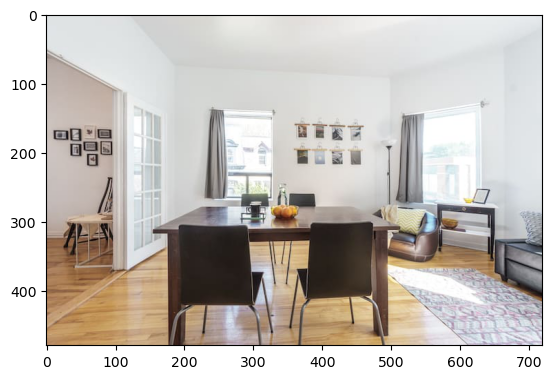

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread("/kaggle/input/copy-of-cisc-873-dm-w23-a4/a4/"+df_train['image'][0])
imgplot = plt.imshow(img)
plt.show()

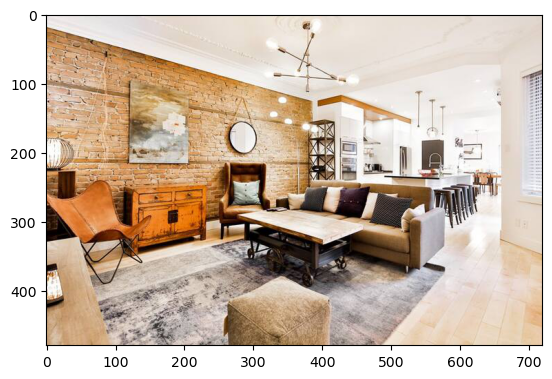

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread("/kaggle/input/copy-of-cisc-873-dm-w23-a4/a4/"+df_train['image'][245])
imgplot = plt.imshow(img)
plt.show()

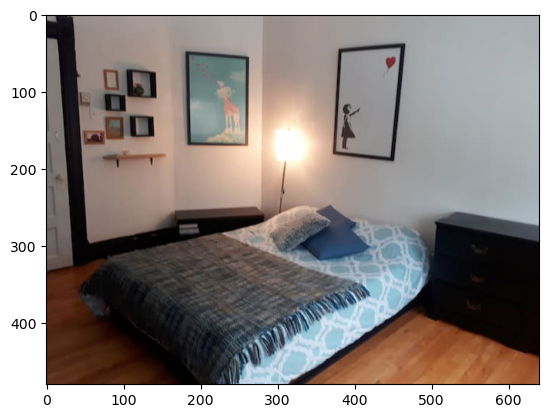

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread("/kaggle/input/copy-of-cisc-873-dm-w23-a4/a4/"+df_train['image'][673])
imgplot = plt.imshow(img)
plt.show()

# Data Preprocessing

We have image and text data.

- Image data: resize
- Text data: tokenization and converting to integer IDs

In [ ]:
#method to load images
#loading the images and converting the images to arrays with size(64,64,2)

def load_image(file):
    try:
        image = Image.open(
            file
        ).convert('LA').resize((64, 64))  #opening image given in file and resize to size(64,64,2)
        arr = np.array(image)             #converting to numpy array
    except:
        arr = np.zeros((64, 64, 2))       #empty array in case of error in above try
    return arr                            #method returns the array


# loading images:
x_train_image = np.array([load_image(i) for i in tqdm(df_train.image)])

# loading overview: (force convert some of the non-string cell to string)
x_train_text = df_train.summary.astype('str')

# get price
y_train_price = df_train.price

# get type
y_train_type = df_train['type']

  0%|          | 0/5472 [00:00<?, ?it/s]

In [ ]:
# preprocess text data

vocab_size = 40000  #defining vocabulary size
max_len = 100       #defining max length of the array for each sequence


# build vocabulary from training set
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(x_train_text)  #vocab based on words in training data


#Method which assigns integer value to each word in the sequence based on vocabulary
#and then transforms into a matrix using pad_sequences

#pad_sequences transforms a list of sequences
#into a 2D Numpy array of shape (num_samples, num_timesteps).
def _preprocess(list_of_text):
    return pad_sequences(
        tokenizer.texts_to_sequences(list_of_text), #transforms each text in texts to sequence of integers
        maxlen=max_len,  #maximum length of all sequences
        padding='post',  #specifying padding after sequence
    )



# padding is done inside:
#preprocessing train and validation text data
x_train_text_id = _preprocess(x_train_text)


#printing shape after preprocessing
print(x_train_text_id.shape)



(5472, 100)


In [ ]:
# we can use the tokenizer to convert IDs to words.
pprint(tokenizer.sequences_to_texts(x_train_text_id[:5]))

['nice functional room for long or short term stays sunny and bright shared '
 'appt with two other lively persons nearby public transit to easy downtown '
 'transportation many services around bakery groceries etc',
 'ideal for resting after your walks in montreal quiet and safe cameras in the '
 'building and concierge 24 24 swimming pool heated',
 'appealing modern apartment in the heart of downtown on saint catherine '
 'street a close walk to everything cafes restaurants bars shops nightclubs '
 'quartier des spectacles and china town 5minutes walk to two subways stations '
 'berri uquam or saint laurent and a 10 minutes walk from old montreal large '
 'studio whit a lot of light in the heart of downtown the studio is big '
 'spaciously fitting queen size bed high speed internet wifi cable free '
 'parking month of november and december',
 'one spacious and clean room with a separate bathroom in a new condo located '
 '10 min from downtown metro and bus a few min away',
 'very spa

In [ ]:
#no. of vocab words

print('total words in the dictionary:', tokenizer.num_words)

total words in the dictionary: 40000


## Helper function

These are helper functions just to easily use just calling the functions with changing the parameters needed.

1. build model fun
2. train model fun
3. preprocessing_testing_data fun
4. predicting_testing_data fun
5. submission_csv

With multi modality and multi objective options. For the last 3 functions have been used in the notebook. for the first 2 func got weird error so I decide to avoid using it.

In [ ]:
def build_model(addiional_text_layer, additional_image_layer,conv_layer,max_pooling_layer ,multi_modality = True, multi_objective = True ):
    # here we have two inputs. one for image and the other for text.
  in_text = keras.Input(batch_shape=(None, max_len))
  in_image = keras.Input(batch_shape=(None, 64, 64, 2))

  # text part
  # simple average of embedding and lstm. you can change it to anything else as needed
  embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text)
  #add_text_layer = addiional_text_layer(embedded)
  averaged = tf.reduce_mean(embedded, axis=1)


  # image part
  # simple Conv2D. you can change it to anything else as needed
  cov = conv_layer(in_image)
  pl = max_pooling_layer(cov)
  # add_image_layer = additional_image_layer(pl)
  flattened = Flatten()(pl)


  # fusion - combinig both
  fused = tf.concat([averaged, flattened], axis=-1)

  # multi-task learning (each is a multi-class classification)
  # one dense layer for each task
  p_type = Dense(len_type, activation='softmax', name='type')(fused)
  # p_language = Dense(len_language, activation='softmax', name='language')(fused)
  p_price = Dense(len_price, activation='softmax', name='price')(fused)

  inputs = dict()
  outputs = dict()
  loss = dict()
  loss_weights = dict()
  metrics = dict()

  if multi_modality and multi_objective:

      inputs = { 'summary': in_text,
          'image': in_image }

      outputs = {
          'price': p_price,
          'type': p_type,}

      loss = {'type': 'sparse_categorical_crossentropy',
          'price': 'sparse_categorical_crossentropy',}

      loss_weights = {
          'type': 0.3,
          'price': 0.7, }

      metrics = {'type': ['SparseCategoricalAccuracy'],
          'price': ['SparseCategoricalAccuracy'],}


  elif multi_modality and (not multi_objective):

      inputs = {'summary': in_text,
          'image': in_image }

      outputs = {'price': p_price}

      loss = {'price': 'sparse_categorical_crossentropy'}

      loss_weights = {'price': 1}

      metrics={ 'price': ['SparseCategoricalAccuracy'] }

  elif (not multi_modality) and multi_objective:
      inputs = {'summary': in_text,}

      outputs = { 'price': p_price,
          'type': p_type, }

      loss = {'type': 'sparse_categorical_crossentropy',
          'price': 'sparse_categorical_crossentropy', }

      loss_weights = { 'type': 0.3,
          'price': 0.7, }

      metrics = {
          'type': ['SparseCategoricalAccuracy'],
          'price': ['SparseCategoricalAccuracy'], }

  else:
      inputs = { 'summary': in_text,}

      outputs = {'price': p_price, }

      loss = {'price': 'sparse_categorical_crossentropy',}

      loss_weights = {'price': 1}

      metrics = { 'price': ['SparseCategoricalAccuracy'],}

  # define model input/output using keys.
  model = keras.Model( inputs, outputs,)

  # compile model with optimizer, loss values for each task, loss
  # weights for each task.
  optimizer=tf.optimizers.RMSprop(learning_rate=0.001)

  model.compile(

      optimizer,
      loss,
      loss_weights,
      metrics,
  )

  model.summary()

  return model

In [ ]:
def train_model(model,multi_modality = True, multi_objective = True):

  x = dict()
  y = dict()

  if multi_modality and multi_objective:
    x = {'summary': x_train_text_id,
        'image': x_train_image }

    y = { 'type': y_train_type,
        'price': y_train_price,}

  elif multi_modality and (not multi_objective):
    x = {'summary': x_train_text_id,
        'image': x_train_image, }

    y = { 'price': y_train_price, }

  elif (not multi_modality) and multi_objective:

    x = {'summary': x_train_text_id, }

    y = { 'type': y_train_type,
        'price': y_train_price,}

  else:
     x = {'summary': x_train_text_id, }
     y = { 'price': y_train_price, }


  history = model.fit(
    x,
    y,
    epochs=20,
    batch_size=16,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_genre_loss', patience=5, )
    ],
    verbose=1
)

  return history

In [ ]:
def preprocessing_testing_data(df_test2):

  # loading images:
  x_test_image = np.array([load_image(i) for i in tqdm(df_test2.image)])

  # loading overview: (force convert some of the non-string cell to string)
  x_test_text = _preprocess(df_test2.summary.astype('str'))

  return x_test_text, x_test_image

In [ ]:
def predict_testing_data(x_test_text, x_test_image,model,multi_modality = True, multi_objective = True):

  if multi_modality :
    y = { 'summary': x_test_text,
        'image': x_test_image }

  else:
    y = { 'summary': x_test_text,}


  # we can do prediction on training set
  y_predict = model.predict(y)

  if multi_objective :
    # probabilities
    price_predicted = y_predict['price']
    type_predicted = y_predict['type']
    print(price_predicted)
    print(type_predicted)

    # categories
    price_category_predicted = np.argmax(price_predicted, axis=1)
    type_category_predicted = np.argmax(type_predicted, axis=1)
    print(price_category_predicted)
    print(type_category_predicted)

    return price_category_predicted, type_category_predicted

  else:
    # probabilities
    price_predicted = y_predict['price']
    print(price_predicted)

    # categories
    price_category_predicted = np.argmax(price_predicted, axis=1)
    print(price_category_predicted)

    return price_category_predicted





In [ ]:
def submission_csv(price_category_predicted,type_category_predicted,name,multi_objective = True):
  #  (if for kaggle competition and it is about genre prediction)
  if multi_objective:

    pd.DataFrame(
      {'id': df_test2.id,
      'price': price_category_predicted,
      'type': type_category_predicted}

  ).to_csv(f'{name}_multi_objective_submission.csv', index=False)

  else:

    pd.DataFrame(
      {'id': df_test2.id,
      'price': price_category_predicted}
  ).to_csv(f'{name}_single_objective_submission.csv', index=False)




# First Trial By using LSTM with mutli modality

In a recurrent neural network we store the output activations from one or more of the layers of the network. Often these are hidden later activations.

Then, the next time we feed an input example to the network, we include the previously-stored outputs as additional inputs. You can think of the additional inputs as being concatenated to the end of the “normal” inputs to the previous layer.



plan for trial 2: to use LSTM layer with 50 units

## Building a Learning model

In [ ]:
# here we have two inputs. one for image and the other for text.
in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2))

# text part
# simple average of embedding and lstm. you can change it to anything else as needed
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text)
lstm = keras.layers.LSTM(units=50, return_sequences=True)(embedded)
averaged = tf.reduce_mean(lstm, axis=1)


# image part
# simple Conv2D. you can change it to anything else as needed
cov = Conv2D(32, (16, 16))(in_image)
pl = MaxPool2D((16, 16))(cov)
flattened = Flatten()(pl)


# fusion - combinig both
fused = tf.concat([averaged, flattened], axis=-1)

# multi-task learning (each is a multi-class classification)
# one dense layer for each task
p_type = Dense(len_type, activation='softmax', name='type')(fused)
# p_language = Dense(len_language, activation='softmax', name='language')(fused)
p_price = Dense(len_price, activation='softmax', name='price')(fused)

# define model input/output using keys.
model_1 = keras.Model(
    inputs={
        'summary': in_text,
        'image': in_image
    },
    outputs={
        'price': p_price,
        'type': p_type,
    },
)


# compile model with optimizer, loss values for each task, loss
# weights for each task.
model_1.compile(
    optimizer=Adam(),
    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'type': 0.3,
        'price': 0.7,
    },
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],
    },
)


model_1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 embedding (Embedding)          (None, 100, 100)     4000000     ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 49, 49, 32)   16416       ['input_2[0][0]']                
                                                                                              

## Model Training
Based on the training/validation performance, you can adjust the epochs to be trained. Early stoping is watching the validation loss on genre prediction (assuming that it is the main task we would like to perform)

In [ ]:
history_1 = model_1.fit(
    x={
        'summary': x_train_text_id,
        'image': x_train_image
    },
    y={
        'type': y_train_type,
        'price': y_train_price,
    },
    epochs=20,
    batch_size=16,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_genre_loss', patience=5, )
    ],
    verbose=1
)

Epoch 1/20
274/274 [==============================] - 32s 93ms/step - loss: 0.9411 - price_loss: 0.8433 - type_loss: 1.1692 - price_sparse_categorical_accuracy: 0.6226 - type_sparse_categorical_accuracy: 0.7599 - val_loss: 0.8740 - val_price_loss: 0.8113 - val_type_loss: 1.0202 - val_price_sparse_categorical_accuracy: 0.6292 - val_type_sparse_categorical_accuracy: 0.7543
Epoch 2/20
274/274 [==============================] - 9s 34ms/step - loss: 0.8302 - price_loss: 0.7720 - type_loss: 0.9659 - price_sparse_categorical_accuracy: 0.6520 - type_sparse_categorical_accuracy: 0.7640 - val_loss: 0.8586 - val_price_loss: 0.8119 - val_type_loss: 0.9677 - val_price_sparse_categorical_accuracy: 0.6219 - val_type_sparse_categorical_accuracy: 0.7580
Epoch 3/20
274/274 [==============================] - 6s 22ms/step - loss: 0.7853 - price_loss: 0.7152 - type_loss: 0.9488 - price_sparse_categorical_accuracy: 0.6943 - type_sparse_categorical_accuracy: 0.7654 - val_loss: 0.8595 - val_price_loss: 0.8158

## preprocessing_testing_data, predict_testing_data and submit file

In [ ]:
x_test_text, x_test_image = preprocessing_testing_data(df_test2)

  0%|          | 0/7360 [00:00<?, ?it/s]

In [ ]:
price_category_predicted_1, type_category_predicted_1 = predict_testing_data(x_test_text, x_test_image,model_1,multi_modality = True, multi_objective = True)

230/230 [==============================] - 1s 4ms/step
[[1.0710129e-01 8.8339585e-01 9.5029222e-03]
 [9.9773264e-01 1.8931172e-03 3.7420663e-04]
 [9.9959809e-01 1.3910375e-04 2.6287619e-04]
 ...
 [5.0935149e-01 4.7780895e-01 1.2839488e-02]
 [9.9997604e-01 8.0826167e-06 1.5887690e-05]
 [9.5492679e-01 3.7534673e-02 7.5385231e-03]]
[[1.71379637e-04 7.83883095e-01 2.90875230e-03 ... 9.43649386e-04
  1.51841240e-02 6.56914199e-04]
 [1.60423053e-06 9.81360435e-01 5.36740001e-04 ... 9.75907969e-05
  1.70418469e-03 1.14264090e-04]
 [2.91314118e-05 2.41173089e-01 2.52665840e-02 ... 2.44601164e-03
  7.77558535e-02 3.91292805e-03]
 ...
 [3.68562105e-05 9.02127445e-01 1.75167283e-03 ... 4.88001038e-04
  6.41120411e-03 3.79528647e-04]
 [1.04939345e-05 1.37520507e-01 4.09707204e-02 ... 2.08367687e-03
  1.19317979e-01 4.23417101e-03]
 [5.21670700e-05 7.82753944e-01 4.39818157e-03 ... 9.01135791e-04
  2.06156652e-02 8.93542194e-04]]
[1 0 0 ... 0 0 0]
[ 1  1 10 ...  1 17  1]


In [ ]:
name = 'conv2d with lstm'
submission_csv(price_category_predicted_1,type_category_predicted_1,name,multi_objective = False)

#### At this trial, I was expecting a score of ~59 on kaggle because it gives me that socre on local , and my score on kaggle was ~0.61 as well.

But the model doesn't appear to be learning much .
It still suffering from the overfitting and the noisy data

# Second Trial By using Conv2D and Dropout with multi modality



Plan for trial 2: we need to predicte both price and type. The archeticture is 1 conv layer for image and simple embedding for text.

## Building a Learning model

In [ ]:
# here we have two inputs. one for image and the other for text.
in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2))

# text part
# simple average of embedding.  you can change it to anything else as needed
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text)
averaged = tf.reduce_mean(embedded, axis=1)


# image part
# simple Conv2D. you can change it to anything else as needed
cov = Conv2D(512, (16, 16))(in_image)
pl = MaxPool2D((16, 16))(cov)
dr = Dropout(0.5)(pl)
flattened = Flatten()(dr)


# fusion - combinig both
fused = tf.concat([averaged, flattened], axis=-1)

# multi-task learning (each is a multi-class classification)
# one dense layer for each task
p_type = Dense(len_type, activation='softmax', name='type')(fused)
# p_language = Dense(len_language, activation='softmax', name='language')(fused)
p_price = Dense(len_price, activation='softmax', name='price')(fused)

# define model input/output using keys.
model_2 = keras.Model(
    inputs={
        'summary': in_text,
        'image': in_image
    },
    outputs={
        'price': p_price,
        'type': p_type,
    },
)


# compile model with optimizer, loss values for each task, loss
# weights for each task.
model_2.compile(
    optimizer=Adam(),
    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'type': 0.3,
        'price': 0.7,
    },
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],
    },
)


model_2.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 conv2d_1 (Conv2D)              (None, 49, 49, 512)  262656      ['input_4[0][0]']                
                                                                                                  
 input_3 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 max_pooling2d_1 (MaxPooling2D)  (None, 3, 3, 512)   0           ['conv2d_1[0][0]']               
                                                                                            

## Model Training
Based on the training/validation performance, you can adjust the epochs to be trained. Early stoping is watching the validation loss on genre prediction (assuming that it is the main task we would like to perform)

In [ ]:
history_2 = model_2.fit(
    x={
        'summary': x_train_text_id,
        'image': x_train_image
    },
    y={
        'type': y_train_type,
        'price': y_train_price,
    },
    epochs=10,
    batch_size=16,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_genre_loss', patience=5, )
    ],
    verbose=1
)

Epoch 1/10


2023-04-14 18:06:21.100690: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_1/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


274/274 [==============================] - 20s 64ms/step - loss: 0.9220 - price_loss: 0.8459 - type_loss: 1.0997 - price_sparse_categorical_accuracy: 0.6228 - type_sparse_categorical_accuracy: 0.7633 - val_loss: 0.8803 - val_price_loss: 0.8377 - val_type_loss: 0.9796 - val_price_sparse_categorical_accuracy: 0.6164 - val_type_sparse_categorical_accuracy: 0.7580
Epoch 2/10
274/274 [==============================] - 9s 32ms/step - loss: 0.8412 - price_loss: 0.7866 - type_loss: 0.9686 - price_sparse_categorical_accuracy: 0.6377 - type_sparse_categorical_accuracy: 0.7654 - val_loss: 0.8321 - val_price_loss: 0.7787 - val_type_loss: 0.9565 - val_price_sparse_categorical_accuracy: 0.6320 - val_type_sparse_categorical_accuracy: 0.7580
Epoch 3/10
274/274 [==============================] - 7s 24ms/step - loss: 0.7781 - price_loss: 0.7055 - type_loss: 0.9473 - price_sparse_categorical_accuracy: 0.6902 - type_sparse_categorical_accuracy: 0.7654 - val_loss: 0.8259 - val_price_loss: 0.7671 - val_type

## preprocessing_testing_data, predict_testing_data and submit file

In [ ]:
x_test_text, x_test_image = preprocessing_testing_data(df_test2)

  0%|          | 0/7360 [00:00<?, ?it/s]

In [ ]:
price_category_predicted_2, type_category_predicted_2 = predict_testing_data(x_test_text, x_test_image,model_2,multi_modality = True, multi_objective = True)

230/230 [==============================] - 3s 11ms/step
[[0.87266505 0.10138791 0.02594703]
 [0.96077704 0.03309995 0.00612298]
 [0.90376115 0.05823346 0.03800542]
 ...
 [0.86058897 0.11926723 0.02014377]
 [0.9834863  0.0129224  0.00359136]
 [0.84723306 0.1269812  0.02578572]]
[[1.9586775e-03 6.8225867e-01 8.9992592e-03 ... 1.5632948e-03
  2.6163664e-02 2.1045823e-03]
 [9.1462868e-04 8.5864002e-01 5.3509460e-03 ... 7.8703894e-04
  1.2358221e-02 1.0010912e-03]
 [3.1759392e-03 3.7621579e-01 1.6157197e-02 ... 2.5001203e-03
  4.9715389e-02 4.2659845e-03]
 ...
 [1.3757605e-03 7.9962265e-01 5.9803929e-03 ... 1.0642710e-03
  1.5694510e-02 1.2716851e-03]
 [1.3041697e-03 7.5232238e-01 9.6955150e-03 ... 1.2408755e-03
  2.2929978e-02 1.9131745e-03]
 [1.3744045e-03 7.8086597e-01 6.0544577e-03 ... 1.1237073e-03
  1.8420486e-02 1.4273056e-03]]
[0 0 0 ... 0 0 0]
[1 1 1 ... 1 1 1]


In [ ]:
name = 'conv2d and dropout with simple average embedding'
submission_csv(price_category_predicted_2,type_category_predicted_2,name,multi_objective = False)

#### At this trial, I was expecting a score of ~66 on kaggle because it gives me that socre on local , and my score on kaggle was ~0.67 as well.

This is the first best one because it seems that the model can't handle well with complext layers. Worked fine with simple and little layer with little units.

# Third Trial By using Bidirectional with LSTM and mutli & single objective and multi modality


- BI-LSTM(Bi-directional long short term memory)
Bidirectional long-short term memory(bi-lstm) is the process of making any neural network o have the sequence information in both directions backwards (future to past) or forward(past to future).

- In bidirectional, our input flows in two directions, making a bi-lstm different from the regular LSTM.

- With the regular LSTM, we can make input flow in one direction, either backwards or forward. However, in bi-directional, we can make the input flow in both directions to preserve the future and the past information.



plan for trial 3:  to use 2 bidirectional layer within LSTM with 32, 64 units.

## Building a Learning model

In [ ]:
# here we have two inputs. one for image and the other for text.
in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2))

# text part
# simple average of embedding.  you can change it to anything else as needed
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text)
bdr_lstm1 = Bidirectional(LSTM(32, return_sequences=True)) (embedded)
bdr_lstm2 = Bidirectional(LSTM(64, return_sequences=True)) (bdr_lstm1)
averaged = tf.reduce_mean(bdr_lstm2, axis=1)


# image part
# simple Conv2D. you can change it to anything else as needed
cov = Conv2D(128, (3, 3))(in_image)
pl = MaxPool2D((3, 3))(cov)
cov2 = Conv2D(256, (3, 3))(pl)
pl2 = MaxPool2D((3, 3))(cov2)
cov3 = Conv2D(512, (3, 3))(pl2)
pl3 = MaxPool2D((3, 3))(cov3)

flattened = Flatten()(pl3)


# fusion - combinig both
fused = tf.concat([averaged, flattened], axis=-1)

# multi-task learning (each is a multi-class classification)
# one dense layer for each task
p_type = Dense(len_type, activation='softmax', name='type')(fused)
# p_language = Dense(len_language, activation='softmax', name='language')(fused)
p_price = Dense(len_price, activation='softmax', name='price')(fused)

# define model input/output using keys.
model_3 = keras.Model(
    inputs={
        'summary': in_text,
        'image': in_image
    },
    outputs={
        'price': p_price,
        'type': p_type,
    },
)


# compile model with optimizer, loss values for each task, loss
# weights for each task.
model_3.compile(
    optimizer=Adam(),
    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'type': 0.3,
        'price': 0.7,
    },
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],
    },
)


model_3.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 conv2d_2 (Conv2D)              (None, 62, 62, 128)  2432        ['input_6[0][0]']                
                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 20, 20, 128)  0          ['conv2d_2[0][0]']               
                                                                                                  
 input_5 (InputLayer)           [(None, 100)]        0           []                               
                                                                                            

## Model Training
Based on the training/validation performance, you can adjust the epochs to be trained. Early stoping is watching the validation loss on genre prediction (assuming that it is the main task we would like to perform)

In [ ]:
history_3 = model_3.fit(
    x={
        'summary': x_train_text_id,
        'image': x_train_image
    },
    y={
        'type': y_train_type,
        'price': y_train_price,
    },
    epochs=8,
    batch_size=16,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_genre_loss', patience=5, )
    ],
    verbose=1
)

Epoch 1/8
274/274 [==============================] - 30s 76ms/step - loss: 0.8764 - price_loss: 0.8056 - type_loss: 1.0418 - price_sparse_categorical_accuracy: 0.6379 - type_sparse_categorical_accuracy: 0.7631 - val_loss: 0.8358 - val_price_loss: 0.7763 - val_type_loss: 0.9747 - val_price_sparse_categorical_accuracy: 0.6557 - val_type_sparse_categorical_accuracy: 0.7580
Epoch 2/8
274/274 [==============================] - 10s 38ms/step - loss: 0.7654 - price_loss: 0.6774 - type_loss: 0.9708 - price_sparse_categorical_accuracy: 0.7103 - type_sparse_categorical_accuracy: 0.7651 - val_loss: 0.8301 - val_price_loss: 0.7797 - val_type_loss: 0.9477 - val_price_sparse_categorical_accuracy: 0.6493 - val_type_sparse_categorical_accuracy: 0.7580
Epoch 3/8
274/274 [==============================] - 8s 29ms/step - loss: 0.6941 - price_loss: 0.5837 - type_loss: 0.9517 - price_sparse_categorical_accuracy: 0.7683 - type_sparse_categorical_accuracy: 0.7645 - val_loss: 0.8369 - val_price_loss: 0.7905 -

## preprocessing_testing_data, predict_testing_data and submit file

In [ ]:
x_test_text, x_test_image = preprocessing_testing_data(df_test2)

  0%|          | 0/7360 [00:00<?, ?it/s]

In [ ]:
price_category_predicted_3, type_category_predicted_3 = predict_testing_data(x_test_text, x_test_image,model_3,multi_modality = True, multi_objective = True)

230/230 [==============================] - 4s 10ms/step
[[9.23076272e-01 6.56317994e-02 1.12919295e-02]
 [9.70338583e-01 2.73487046e-02 2.31273100e-03]
 [9.67660785e-01 2.71240771e-02 5.21511212e-03]
 ...
 [9.12252307e-01 7.61035532e-02 1.16440570e-02]
 [9.97839808e-01 1.96202239e-03 1.98155336e-04]
 [9.70637143e-01 2.42667720e-02 5.09620598e-03]]
[[1.1081109e-03 4.2827994e-01 2.3990054e-02 ... 4.3742103e-03
  4.4651281e-02 2.8886683e-03]
 [7.2747032e-05 9.3026078e-01 2.9528728e-03 ... 3.6739366e-04
  4.4788350e-03 1.6220260e-04]
 [9.4836560e-04 3.3807442e-01 3.6241312e-02 ... 4.8232283e-03
  5.2486774e-02 3.6235512e-03]
 ...
 [5.3901511e-04 7.2564620e-01 1.1913370e-02 ... 2.0743886e-03
  1.9902678e-02 1.0479147e-03]
 [9.4941039e-05 7.4889982e-01 9.9551603e-03 ... 7.1734627e-04
  1.8576002e-02 6.3091022e-04]
 [1.0581757e-03 2.2772622e-01 2.5234539e-02 ... 3.1790351e-03
  6.2243536e-02 3.3397824e-03]]
[0 0 0 ... 0 0 0]
[ 1  1  1 ...  1  1 10]


In [ ]:
price_category_predicted_3_2 = predict_testing_data(x_test_text, x_test_image,model_3,multi_modality = True, multi_objective = False)

230/230 [==============================] - 2s 10ms/step
[[9.23076272e-01 6.56317994e-02 1.12919295e-02]
 [9.70338583e-01 2.73487046e-02 2.31273100e-03]
 [9.67660785e-01 2.71240771e-02 5.21511212e-03]
 ...
 [9.12252307e-01 7.61035532e-02 1.16440570e-02]
 [9.97839808e-01 1.96202239e-03 1.98155336e-04]
 [9.70637143e-01 2.42667720e-02 5.09620598e-03]]
[0 0 0 ... 0 0 0]


In [ ]:
name = '2 bidirectional lstm layers and with simple average embedding and 3 conv2d layers_multi'
submission_csv(price_category_predicted_3,type_category_predicted_3,name,multi_objective = True)

In [ ]:
name = '2 bidirectional lstm layers and with simple average embedding and 3 conv2d layers_single'
submission_csv(price_category_predicted_3_2,type_category_predicted_3,name,multi_objective = False)

#### At this trial, I was expecting a score of ~64 on kaggle because it gives me that socre on local , and my score on kaggle was ~0.64 as well.

But the model doesn't appear to be learning much .
It still suffering from the overfitting and the noisy data. Try another model

# Forth Trial By using GRU with mutli modality (single and multi objective)


In simple words, the GRU unit does not have to use a memory unit to control the flow of information like the LSTM unit. It can directly makes use of the all hidden states without any control. GRUs have fewer parameters and thus may train a bit faster or need less data to generalize. But, with large data, the LSTMs with higher expressiveness may lead to better results.

They are almost similar to LSTMs except that they have two gates: reset gate and update gate. Reset gate determines how to combine new input to previous memory and update gate determines how much of the previous state to keep. Update gate in GRU is what input gate and forget gate were in LSTM. We don't have the second non linearity in GRU before calculating the outpu, .neither they have the output gate.


plan for trial 1: to use GRU network with 8 units

## Building a Learning model

In [ ]:
from keras.layers.pooling.max_pooling1d import MaxPooling1D, MaxPool1D
from keras.layers.convolutional.conv1d_transpose import Conv1D
# here we have two inputs. one for image and the other for text.
# in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2))

# text part
# simple average of embedding.  you can change it to anything else as needed
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text)
bdr_lstm1 = Bidirectional(LSTM(8, return_sequences=True)) (embedded)
gru = GRU(8, return_sequences=True) (bdr_lstm1)
conv = Conv1D(10,3)(gru)
pool = MaxPooling1D(3)(conv)

averaged = tf.reduce_mean(gru, axis=1)


# image part
# simple Conv2D. you can change it to anything else as needed
cov = Conv2D(32, (16, 16))(in_image)
pl = MaxPool2D((16, 16))(cov)
flattened = Flatten()(pl)


# multi-task learning (each is a multi-class classification)
# one dense layer for each task
p_type = Dense(len_type, activation='softmax', name='type')(flattened)
# p_language = Dense(len_language, activation='softmax', name='language')(fused)
p_price = Dense(len_price, activation='softmax', name='price')(flattened)

# define model input/output using keys.
model_4 = keras.Model(
    inputs={
        'summary': in_text,
        'image': in_image,
    },
    outputs={
        'price': p_price,
        'type': p_type,
    },
)


# compile model with optimizer, loss values for each task, loss
# weights for each task.
model_4.compile(
    optimizer=Adam(),
    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'type': 0.3,
        'price': 0.7,
    },
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],
    },
)


model_4.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 conv2d_5 (Conv2D)              (None, 49, 49, 32)   16416       ['input_7[0][0]']                
                                                                                                  
 max_pooling2d_5 (MaxPooling2D)  (None, 3, 3, 32)    0           ['conv2d_5[0][0]']               
                                                                                                  
 flatten_3 (Flatten)            (None, 288)          0           ['max_pooling2d_5[0][0]']        
                                                                                            

## Model Training
Based on the training/validation performance, you can adjust the epochs to be trained. Early stoping is watching the validation loss on genre prediction (assuming that it is the main task we would like to perform)

In [ ]:
history_4 = model_4.fit(
    x={ 'summary': x_train_text_id,
        'image': x_train_image
    },
    y={
        'type': y_train_type,
        'price': y_train_price,
    },
    epochs=10,
    batch_size=16,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_genre_loss', patience=5, )
    ],
    verbose=1
)

Epoch 1/10
274/274 [==============================] - 3s 7ms/step - loss: 1.0033 - price_loss: 0.8552 - type_loss: 1.3488 - price_sparse_categorical_accuracy: 0.6244 - type_sparse_categorical_accuracy: 0.7622 - val_loss: 0.8836 - val_price_loss: 0.8433 - val_type_loss: 0.9777 - val_price_sparse_categorical_accuracy: 0.6164 - val_type_sparse_categorical_accuracy: 0.7580
Epoch 2/10
274/274 [==============================] - 2s 6ms/step - loss: 0.8774 - price_loss: 0.8335 - type_loss: 0.9797 - price_sparse_categorical_accuracy: 0.6244 - type_sparse_categorical_accuracy: 0.7654 - val_loss: 0.8838 - val_price_loss: 0.8435 - val_type_loss: 0.9777 - val_price_sparse_categorical_accuracy: 0.6164 - val_type_sparse_categorical_accuracy: 0.7580
Epoch 3/10
274/274 [==============================] - 2s 6ms/step - loss: 0.8760 - price_loss: 0.8324 - type_loss: 0.9776 - price_sparse_categorical_accuracy: 0.6244 - type_sparse_categorical_accuracy: 0.7654 - val_loss: 0.8846 - val_price_loss: 0.8443 - v

## preprocessing_testing_data, predict_testing_data and submit file

In [ ]:
x_test_text, x_test_image = preprocessing_testing_data(df_test2)

  0%|          | 0/7360 [00:00<?, ?it/s]

In [ ]:
price_category_predicted_4, type_category_predicted_4 = predict_testing_data(x_test_text, x_test_image,model_4,multi_modality = True, multi_objective = True)

230/230 [==============================] - 1s 2ms/step
[[0.6007587  0.33203703 0.06720427]
 [0.6007587  0.33203703 0.06720427]
 [0.6007587  0.33203703 0.06720427]
 ...
 [0.6007587  0.33203703 0.06720427]
 [0.6007587  0.33203703 0.06720427]
 [0.6007587  0.33203703 0.06720427]]
[[7.3603343e-04 7.5914896e-01 4.9555935e-03 ... 6.7631237e-04
  2.2540458e-02 7.6149823e-04]
 [7.3603343e-04 7.5914896e-01 4.9555935e-03 ... 6.7631237e-04
  2.2540458e-02 7.6149823e-04]
 [7.3603343e-04 7.5914896e-01 4.9555935e-03 ... 6.7631237e-04
  2.2540458e-02 7.6149823e-04]
 ...
 [7.3603343e-04 7.5914896e-01 4.9555935e-03 ... 6.7631237e-04
  2.2540458e-02 7.6149823e-04]
 [7.3603343e-04 7.5914896e-01 4.9555935e-03 ... 6.7631237e-04
  2.2540458e-02 7.6149823e-04]
 [7.3603343e-04 7.5914896e-01 4.9555935e-03 ... 6.7631237e-04
  2.2540458e-02 7.6149823e-04]]
[0 0 0 ... 0 0 0]
[1 1 1 ... 1 1 1]


In [ ]:
price_category_predicted_4_2 = predict_testing_data(x_test_text, x_test_image,model_4,multi_modality = True, multi_objective = False)

230/230 [==============================] - 1s 2ms/step
[[0.6007587  0.33203703 0.06720427]
 [0.6007587  0.33203703 0.06720427]
 [0.6007587  0.33203703 0.06720427]
 ...
 [0.6007587  0.33203703 0.06720427]
 [0.6007587  0.33203703 0.06720427]
 [0.6007587  0.33203703 0.06720427]]
[0 0 0 ... 0 0 0]


In [ ]:
name = ' mixed layer text and  conv2d layers image _multi'
submission_csv(price_category_predicted_4,type_category_predicted_4,name,multi_objective = True)

In [ ]:
name = ' mixed layer text and  conv2d layers image _single'
submission_csv(price_category_predicted_4_2,type_category_predicted_4,name,multi_objective = False)

#### At this trial, I was expecting a score of ~ 61 on kaggle because it gives me that socre on local , but my score on kaggle was ~0.62.

And as we can see the training price accuracy improves and the validation price accuracy have tons of overfitting we will use another model hoping to increase the accuracy.

# Fifth trial By using Bidirectional with GRU with mutli modality

**Bidirectional Gated Recurrent Unit (GRU)**

Bidirectional GRU’s are a type of bidirectional recurrent neural networks with only the input and forget gates. It allows for the use of information from both previous time steps and later time steps to make predictions about the current state. Figure 3 displays the typical structure of a bidirectional recurrent neural network.


plan for trial 4: to use bidirectional layer within GRU with 8 units and '16' for GRU layer.

## Building a Learning model

In [ ]:
# here we have two inputs. one for image and the other for text.
in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2))

# text part
# simple average of embedding.  you can change it to anything else as needed
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text)
bdr_gru1 = Bidirectional(GRU(8, return_sequences=True)) (embedded)
bdr_gru2 = GRU(16, return_sequences=True) (bdr_gru1)
averaged = tf.reduce_mean(bdr_gru2, axis=1)


# image part
# simple Conv2D. you can change it to anything else as needed
cov = Conv2D(8, (3, 3))(in_image)
pl = MaxPool2D((3, 3))(cov)
cov2 = Conv2D(16, (3, 3))(pl)
pl2 = MaxPool2D((3, 3))(cov2)
dr = Dropout(0.1)(pl2)

flattened = Flatten()(dr)


# fusion - combinig both
fused = tf.concat([averaged, flattened], axis=-1)

# multi-task learning (each is a multi-class classification)
# one dense layer for each task
p_type = Dense(len_type, activation='softmax', name='type')(fused)
# p_language = Dense(len_language, activation='softmax', name='language')(fused)
p_price = Dense(len_price, activation='softmax', name='price')(fused)

# define model input/output using keys.
model_5 = keras.Model(
    inputs={
        'summary': in_text,
        'image': in_image
    },
    outputs={
        'price': p_price,
    },
)


# compile model with optimizer, loss values for each task, loss
# weights for each task.
model_5.compile(
    optimizer=Adam(),
    loss={
        'price': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'price': 1,
    },
    metrics={
        'price': ['SparseCategoricalAccuracy'],
    },
)


model_5.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 conv2d_6 (Conv2D)              (None, 62, 62, 8)    152         ['input_9[0][0]']                
                                                                                                  
 input_8 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 max_pooling2d_6 (MaxPooling2D)  (None, 20, 20, 8)   0           ['conv2d_6[0][0]']               
                                                                                            

## Model Training
Based on the training/validation performance, you can adjust the epochs to be trained. Early stoping is watching the validation loss on genre prediction (assuming that it is the main task we would like to perform)

In [ ]:
history_5 = model_5.fit(
    x={
        'summary': x_train_text_id,
        'image': x_train_image
    },
    y={
        'price': y_train_price,
    },
    epochs=10,
    batch_size=16,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_genre_loss', patience=5, )
    ],
    verbose=1
)

Epoch 1/10


2023-04-14 18:16:41.717293: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_4/dropout_1/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


274/274 [==============================] - 25s 67ms/step - loss: 0.8288 - sparse_categorical_accuracy: 0.6285 - val_loss: 0.7990 - val_sparse_categorical_accuracy: 0.6128
Epoch 2/10
274/274 [==============================] - 7s 27ms/step - loss: 0.6804 - sparse_categorical_accuracy: 0.7025 - val_loss: 0.7900 - val_sparse_categorical_accuracy: 0.6539
Epoch 3/10
274/274 [==============================] - 6s 23ms/step - loss: 0.5765 - sparse_categorical_accuracy: 0.7704 - val_loss: 0.8056 - val_sparse_categorical_accuracy: 0.6347
Epoch 4/10
274/274 [==============================] - 6s 20ms/step - loss: 0.4911 - sparse_categorical_accuracy: 0.8145 - val_loss: 0.8627 - val_sparse_categorical_accuracy: 0.6429
Epoch 5/10
274/274 [==============================] - 5s 18ms/step - loss: 0.4117 - sparse_categorical_accuracy: 0.8442 - val_loss: 0.9407 - val_sparse_categorical_accuracy: 0.6420
Epoch 6/10
274/274 [==============================] - 6s 22ms/step - loss: 0.3270 - sparse_categorical_ac

## preprocessing_testing_data, predict_testing_data and submit file

In [ ]:
x_test_text, x_test_image = preprocessing_testing_data(df_test2)

  0%|          | 0/7360 [00:00<?, ?it/s]

In [ ]:
price_category_predicte_5  = predict_testing_data(x_test_text, x_test_image,model_5,multi_modality = True, multi_objective = False)
type_category_predicted = 0

230/230 [==============================] - 1s 6ms/step
[[9.7553694e-01 2.3856871e-02 6.0627214e-04]
 [9.9397910e-01 5.7904678e-03 2.3043797e-04]
 [9.9034834e-01 9.3004229e-03 3.5118294e-04]
 ...
 [7.8270143e-01 2.1392760e-01 3.3710133e-03]
 [9.9758935e-01 2.2822416e-03 1.2848340e-04]
 [1.6605633e-01 8.2251489e-01 1.1428820e-02]]
[0 0 0 ... 0 0 1]


In [ ]:
name = '1 bidirectional gru and gru layers and with simple average embedding and 2 conv2d layers with dropout_single'
submission_csv(price_category_predicte_5,type_category_predicted,name,multi_objective = False)

#### At this trial, I was expecting a score of ~59 on kaggle because it gives me that socre on local , and my score on kaggle was ~0.61

The data is very noisy. We know there is a lot of overfitting even if you change the model, the accuracy can't be increased.




# Sixth Trial By using Conv2D (Multi-Objective) and single modality



Plan for trial 6: we need to predicte both price and type using conv2d for image feature only. The archeticture is 5 conv layers.

## Building a Learning model

In [ ]:
# here we have two inputs. one for image and the other for text.
# in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2))

# text part
# simple average of embedding.  you can change it to anything else as needed
# embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text)
# bdr_lstm1 = Bidirectional(LSTM(32, return_sequences=True)) (embedded)
# bdr_lstm2 = Bidirectional(LSTM(64, return_sequences=True)) (bdr_lstm1)
# averaged = tf.reduce_mean(bdr_lstm2, axis=1)


# image part
# simple Conv2D. you can change it to anything else as needed
cov = Conv2D(8, (2, 2))(in_image)
pl = MaxPool2D((2, 2))(cov)
cov2 = Conv2D(8, (2, 2))(pl)
pl2 = MaxPool2D((2, 2))(cov2)
cov3 = Conv2D(8, (2, 2))(pl2)
pl3 = MaxPool2D((2, 2))(cov3)
cov4 = Conv2D(8, (2, 2))(pl3)
pl4 = MaxPool2D((2, 2))(cov4)
cov5 = Conv2D(8, (2, 2))(pl4)
pl5 = MaxPool2D((2, 2))(cov5)

flattened = Flatten()(pl5)


# multi-task learning (each is a multi-class classification)
# one dense layer for each task
p_type = Dense(len_type, activation='softmax', name='type')(flattened)
# p_language = Dense(len_language, activation='softmax', name='language')(fused)
p_price = Dense(len_price, activation='softmax', name='price')(flattened)

# define model input/output using keys.
model_6 = keras.Model(
    inputs={
        'image': in_image
    },
    outputs={
        'price': p_price,
        'type': p_type,
    },
)


# compile model with optimizer, loss values for each task, loss
# weights for each task.
model_6.compile(
    optimizer=Adam(),
    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'type': 0.3,
        'price': 0.7,
    },
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],
    },
)


model_6.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 conv2d_8 (Conv2D)              (None, 63, 63, 8)    72          ['input_10[0][0]']               
                                                                                                  
 max_pooling2d_8 (MaxPooling2D)  (None, 31, 31, 8)   0           ['conv2d_8[0][0]']               
                                                                                                  
 conv2d_9 (Conv2D)              (None, 30, 30, 8)    264         ['max_pooling2d_8[0][0]']        
                                                                                            

## Model Training
Based on the training/validation performance, you can adjust the epochs to be trained. Early stoping is watching the validation loss on genre prediction (assuming that it is the main task we would like to perform)

In [ ]:
history_6 = model_6.fit(
    x={
        'image': x_train_image
    },
    y={
        'type': y_train_type,
        'price': y_train_price,
    },
    epochs=15,
    batch_size=16,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_genre_loss', patience=5, )
    ],
    verbose=1
)

Epoch 1/15
274/274 [==============================] - 5s 9ms/step - loss: 1.0637 - price_loss: 0.8639 - type_loss: 1.5298 - price_sparse_categorical_accuracy: 0.6244 - type_sparse_categorical_accuracy: 0.6418 - val_loss: 0.8984 - val_price_loss: 0.8530 - val_type_loss: 1.0043 - val_price_sparse_categorical_accuracy: 0.6164 - val_type_sparse_categorical_accuracy: 0.7580
Epoch 2/15
274/274 [==============================] - 2s 7ms/step - loss: 0.8874 - price_loss: 0.8427 - type_loss: 0.9917 - price_sparse_categorical_accuracy: 0.6244 - type_sparse_categorical_accuracy: 0.7654 - val_loss: 0.8943 - val_price_loss: 0.8536 - val_type_loss: 0.9891 - val_price_sparse_categorical_accuracy: 0.6164 - val_type_sparse_categorical_accuracy: 0.7580
Epoch 3/15
274/274 [==============================] - 2s 7ms/step - loss: 0.8800 - price_loss: 0.8366 - type_loss: 0.9812 - price_sparse_categorical_accuracy: 0.6244 - type_sparse_categorical_accuracy: 0.7654 - val_loss: 0.8866 - val_price_loss: 0.8456 - v

## preprocessing_testing_data, predict_testing_data and submit file

In [ ]:
x_test_text, x_test_image = preprocessing_testing_data(df_test2)

  0%|          | 0/7360 [00:00<?, ?it/s]

In [ ]:
price_category_predicted_6, type_category_predicted_6 = predict_testing_data(x_test_text, x_test_image,model_6,multi_modality = True, multi_objective = True)

 12/230 [>.............................] - ETA: 1s 

/opt/conda/lib/python3.7/site-packages/keras/engine/functional.py:638: UserWarning: Input dict contained keys ['summary'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


230/230 [==============================] - 1s 3ms/step
[[0.6134523  0.3115195  0.07502825]
 [0.6134523  0.3115195  0.07502825]
 [0.6134523  0.3115195  0.07502825]
 ...
 [0.6134523  0.3115195  0.07502825]
 [0.6134523  0.3115195  0.07502825]
 [0.6134523  0.3115195  0.07502825]]
[[0.00097987 0.74892396 0.00567499 ... 0.00098144 0.02202065 0.00096093]
 [0.00097987 0.74892396 0.00567499 ... 0.00098144 0.02202065 0.00096093]
 [0.00097987 0.74892396 0.00567499 ... 0.00098144 0.02202065 0.00096093]
 ...
 [0.00097987 0.74892396 0.00567499 ... 0.00098144 0.02202065 0.00096093]
 [0.00097987 0.74892396 0.00567499 ... 0.00098144 0.02202065 0.00096093]
 [0.00097987 0.74892396 0.00567499 ... 0.00098144 0.02202065 0.00096093]]
[0 0 0 ... 0 0 0]
[1 1 1 ... 1 1 1]


In [ ]:
price_category_predicted_6_2 = predict_testing_data(x_test_text, x_test_image,model_6,multi_modality = True, multi_objective = False)

230/230 [==============================] - 1s 2ms/step
[[0.6134523  0.3115195  0.07502825]
 [0.6134523  0.3115195  0.07502825]
 [0.6134523  0.3115195  0.07502825]
 ...
 [0.6134523  0.3115195  0.07502825]
 [0.6134523  0.3115195  0.07502825]
 [0.6134523  0.3115195  0.07502825]]
[0 0 0 ... 0 0 0]


In [ ]:
name = ' 5 conv2d layers image only _multi'
submission_csv(price_category_predicted_6,type_category_predicted_6,name,multi_objective = True)

In [ ]:
name = '5 conv2d layers image only _single'
submission_csv(price_category_predicted_6_2,type_category_predicted_6,name,multi_objective = False)

#### At this trial, I was expecting a score of ~61 on kaggle because it gives me that socre on local , and my score on kaggle was ~0.62

The data is very noisy. We know there is a lot of overfitting even if you change the model, the accuracy can't be increased. Also increasing the complexity made to model to get worse. Mutiple modality enhance the accuracy alot. Not recommended to use image only

# Senventh Trial by simple average embedding and conv2d with multi modality


Plan for trial 7: Try to build simple model as much I can by only use embedding layer for text feature and 1 conv layer with 32 neurons for image features.

## Building a Learning model

In [ ]:
# here we have two inputs. one for image and the other for text.
in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2))

# text part
# simple average of embedding and lstm. you can change it to anything else as needed
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text)
averaged = tf.reduce_mean(embedded, axis=1)


# image part
# simple Conv2D. you can change it to anything else as needed
cov = Conv2D(32, (16, 16))(in_image)
pl = MaxPool2D((16, 16))(cov)
flattened = Flatten()(pl)


# fusion - combinig both
fused = tf.concat([averaged, flattened], axis=-1)

# multi-task learning (each is a multi-class classification)
# one dense layer for each task
p_type = Dense(len_type, activation='softmax', name='type')(fused)
# p_language = Dense(len_language, activation='softmax', name='language')(fused)
p_price = Dense(len_price, activation='softmax', name='price')(fused)

# define model input/output using keys.
model_7 = keras.Model(
    inputs={
        'summary': in_text,
        'image': in_image
    },
    outputs={
        'price': p_price,
        'type': p_type,
    },
)


# compile model with optimizer, loss values for each task, loss
# weights for each task.
model_7.compile(
    optimizer=Adam(),
    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'type': 0.3,
        'price': 0.7,
    },
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],
    },
)


model_7.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 input_11 (InputLayer)          [(None, 100)]        0           []                               
                                                                                                  
 conv2d_13 (Conv2D)             (None, 49, 49, 32)   16416       ['input_12[0][0]']               
                                                                                                  
 embedding_5 (Embedding)        (None, 100, 100)     4000000     ['input_11[0][0]']               
                                                                                            

## Model Training
Based on the training/validation performance, you can adjust the epochs to be trained. Early stoping is watching the validation loss on genre prediction (assuming that it is the main task we would like to perform)

In [ ]:
history_7 = model_7.fit(
    x={
        'summary': x_train_text_id,
        'image': x_train_image
    },
    y={
        'type': y_train_type,
        'price': y_train_price,
    },
    epochs=5,
    batch_size=16,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_genre_loss', patience=5, )
    ],
    verbose=1
)

Epoch 1/5
274/274 [==============================] - 16s 53ms/step - loss: 0.9883 - price_loss: 0.8499 - type_loss: 1.3112 - price_sparse_categorical_accuracy: 0.6221 - type_sparse_categorical_accuracy: 0.7592 - val_loss: 0.8749 - val_price_loss: 0.8328 - val_type_loss: 0.9729 - val_price_sparse_categorical_accuracy: 0.6164 - val_type_sparse_categorical_accuracy: 0.7580
Epoch 2/5
274/274 [==============================] - 6s 20ms/step - loss: 0.8492 - price_loss: 0.7990 - type_loss: 0.9665 - price_sparse_categorical_accuracy: 0.6274 - type_sparse_categorical_accuracy: 0.7654 - val_loss: 0.8498 - val_price_loss: 0.8017 - val_type_loss: 0.9620 - val_price_sparse_categorical_accuracy: 0.6292 - val_type_sparse_categorical_accuracy: 0.7580
Epoch 3/5
274/274 [==============================] - 3s 12ms/step - loss: 0.8012 - price_loss: 0.7395 - type_loss: 0.9452 - price_sparse_categorical_accuracy: 0.6715 - type_sparse_categorical_accuracy: 0.7654 - val_loss: 0.8249 - val_price_loss: 0.7723 - 

## preprocessing_testing_data, predict_testing_data and submit file

In [ ]:
x_test_text, x_test_image = preprocessing_testing_data(df_test2)

  0%|          | 0/7360 [00:00<?, ?it/s]

In [ ]:
price_category_predicted_7, type_category_predicted_7 = predict_testing_data(x_test_text, x_test_image,model_7,multi_modality = True, multi_objective = True)

230/230 [==============================] - 1s 2ms/step
[[0.7725196  0.18870364 0.03877679]
 [0.83051306 0.14054097 0.028946  ]
 [0.7414767  0.20693347 0.05158984]
 ...
 [0.7731195  0.19227223 0.0346082 ]
 [0.8843014  0.09258561 0.02311294]
 [0.64733356 0.29569083 0.0569756 ]]
[[8.6705829e-04 7.3484457e-01 5.2155261e-03 ... 7.2970922e-04
  2.3710659e-02 7.9894555e-04]
 [6.3656172e-04 7.9134214e-01 4.1756951e-03 ... 5.2789581e-04
  1.8783076e-02 5.7587144e-04]
 [1.0896571e-03 6.7293644e-01 6.3253404e-03 ... 9.0194732e-04
  2.8148724e-02 9.7148644e-04]
 ...
 [6.9395307e-04 7.7115756e-01 4.3427716e-03 ... 5.7240407e-04
  2.0008642e-02 6.0342252e-04]
 [8.4759993e-04 7.4857420e-01 5.5709737e-03 ... 7.2808849e-04
  2.3952100e-02 8.6201122e-04]
 [8.2782900e-04 7.4666941e-01 4.6333708e-03 ... 7.0567674e-04
  2.2062425e-02 7.5668033e-04]]
[0 0 0 ... 0 0 0]
[1 1 1 ... 1 1 1]


In [ ]:
name = 'conv2d with simple embedding'
submission_csv(price_category_predicted_7,type_category_predicted_7,name,multi_objective = False)

#### At this trial, I was expecting a score of ~66 on kaggle because it gives me that socre on local , and my score on kaggle was ~0.66

This is the second best one because it seems that the model can't handle well with complext layers. Worked fine with simple and little layer with little units.

# Model building utilities for trial _8 (bouns)

**For Transfer learning and up-training**


The model consists of the following elements:

* A standalone encoder for the images. We will use a
[VGG16](https://arxiv.org/abs/1603.05027) pre-trained on the ImageNet-1k dataset for
this.



In [ ]:
df_test2.shape

(7360, 3)

In [ ]:
#method to load images
#loading the images and converting the images to arrays with size(64,64,2)

def load_image(file):
    try:
        image = Image.open(
            file
        ).convert('LA').resize((128, 128))  #opening image given in file and resize to size(64,64,2)
        arr = np.array(image)             #converting to numpy array
    except:
        arr = np.zeros((128, 128, 3))       #empty array in case of error in above try
    return arr                            #method returns the array


# loading images:
x_train_image = np.array([load_image(i) for i in tqdm(df_train.image)])
x_test_image = np.array([load_image(i) for i in tqdm(df_test2.image)])

# loading overview: (force convert some of the non-string cell to string)
x_train_text = df_train.summary.astype('str')

# get price
y_train_price = df_train.price

# get type
y_train_type = df_train['type']

  0%|          | 0/5476 [00:00<?, ?it/s]

  0%|          | 0/7360 [00:00<?, ?it/s]

In [ ]:
# VGG-16
from tensorflow.keras.applications.vgg16  import VGG16
from tensorflow import keras

preTrainedModelVgg16 = VGG16(input_shape = (128, 128, 3), include_top = False, weights='imagenet')

VGG16layers=preTrainedModelVgg16.layers
print("Number of layer Vgg16 : ",len(VGG16layers))

58889256/58889256 [==============================] - 0s 0us/step
Number of layer Vgg16 :  19


In [ ]:
for layer  in range(len(VGG16layers)-5):
       VGG16layers[layer].trainable = False

preTrainedModelVgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [ ]:
# #Vgg16 Model
x=Flatten()(preTrainedModelVgg16.output)

#Fully Connection Layer
# FC1
x=Dense(1024, activation="relu")(x)
# FC2
x=Dense(1024, activation="relu")(x)
# FC3
x=Dense(1024, activation="relu")(x)
#Dropout to avoid overfitting effect
x=Dropout(0.5)(x)
# FC4
x=Dense(512, activation="relu")(x)
# FC5
x=Dense(512, activation="relu")(x)
#Dropout to avoid overfitting effect
x=Dropout(0.4)(x)
# FC6
x=Dense(256, activation="relu")(x)
# FC7
x=Dense(64, activation="relu")(x)
# FC8
x=Dense(64, activation="relu")(x)
#Dropout to avoid overfitting effect
x=Dropout(0.2)(x)
#output layer
x=Dense(3,activation="softmax")(x)

In [ ]:
#concatenation layers
modelVgg16=tf.keras.Model(preTrainedModelVgg16.input,x)
modelVgg16.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [ ]:
#compile Vgg16 Model
modelVgg16.compile(optimizer='adam', loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [ ]:
#fit Vgg16 Model
historyVgg16Model=modelVgg16.fit(x_train_image,y_train_price,
                                 epochs=4 ,
                                 batch_size =12 ,
                                 verbose=1)

Epoch 1/4
457/457 [==============================] - 33s 33ms/step - loss: 0.8754 - accuracy: 0.6129
Epoch 2/4
457/457 [==============================] - 14s 31ms/step - loss: 0.8415 - accuracy: 0.6233
Epoch 3/4
457/457 [==============================] - 14s 31ms/step - loss: 0.8408 - accuracy: 0.6233
Epoch 4/4
457/457 [==============================] - 14s 31ms/step - loss: 0.8382 - accuracy: 0.6233


In [ ]:
#predict Vgg16 Model
PredmodelVgg16= modelVgg16.predict(x_test_image)

#Process on Prediction values for Vgg16 Model
PredmodelVgg16= np.argmax(PredmodelVgg16,axis=1)
print("\nPrediction values for Vgg16 Model :\n",PredmodelVgg16)
type_category_predicted_8 = 0

230/230 [==============================] - 10s 41ms/step

Prediction values for Vgg16 Model :
 [0 0 0 ... 0 0 0]


In [ ]:
name = 'transfer learning'
submission_csv(PredmodelVgg16,type_category_predicted_8,name,multi_objective = False)

#### At this trial, I was expecting a score of ~62 on kaggle because it gives me that socre on local , but my score on kaggle was ~0.62 because still there are alot of overfitting . Although I use pre-trained models, I think these models are very complex to make that overfit !


# **The End**

### Overall,My trial (2) : without GRU/LSTM/BIDirectional layer and with Dropout layer significantly assisted me in achieving my highest score on the leaderboard with score of (0.66). Although I put in a lot of effort, in my processing_2 with a pre-trained model and also with more data cleaning that doesn't protect this model from overfitting.

# **Answer the Questions**

## 1. Is fully-connected model a good one for sequential data? Why? How about for image data? Is it good? Why?

- No, Data is described as sequential when points in the dataset are dependent on other points in the dataset. thus it's not an appropriate sequential data model because it doesn't account for memory constraints. It also has a set length, and the fully connected model does not share weights and cannot handle large amounts of data.

- No, it's not suitable for photos since they'll have too many weights in the first layer, which will raise customisation, and the fully connected model doesn't share weights and can't handle large amounts of data.








---

## 2. What is gradient vanishing and gradient explosion, and how GRU/LSTM tries to mitigate this problem?

- **Gradient vanishing** means that the gradient is too near to zero cause of wieghts value is too small, but explosion is mean the gradient is too
large cause of gradient value is larger than 1.

- **Gradients vanishing and exploding** are recurrent neural network phenomena in which gradients get exponentially larger or smaller when they are backpropagated across network layers. This is due to the chain rule, which causes the gradients of lower network layers, or layers several timesteps backward in the case of RNNs, to be multiplied multiple times. When a gradient vanishes, the network can only learn things near the conclusion of a sequence. Memory needs will become a restriction in the case of exploding gradients.

- This problem is addressed by LSTM/GRU, which uses a gated design to manage information flow. Information important for long-term sequence modelling is kept here, while information only needed for short-term learning is "lost." Internal gates in LSTMs control cell state, allowing the LSTM to decide which information from prior steps in the sequence to keep or forget.

- GRU and LSTM solve this problem by adding gates to decide what is the ratio that we need to take from each feature and it changes in the way
of computing.

- LSTM/GRU (effectively using a different activation dynamics)
Attention mechanisms (Their broader purpose is to enable more memory size into RNNs. Specifically, Attention accomplishes this by enabling direct connections between any 2 nodes far away, thereby also reducing length of flow)


Res:

[vanishing-gradient-problem](https://towardsdatascience.com/the-vanishing-gradient-problem-69bf08b15484)

[What-is-the-vanishing-gradient-problem](https://www.quora.com/What-is-the-vanishing-gradient-problem)

[exploding-gradients-in-neural-networks](https://machinelearningmastery.com/exploding-gradients-in-neural-networks/)





---

## 3. What is multi-objective/multi-task learning? What is multi-modality learning? How do you use them in this assignment?

- **Multi-objective/Task Learning (MTL)** is a learning paradigm in machine learning and its aim is to leverage useful information
contained in multiple related tasks to help improve the generalization performance of all the tasks,


- **Multimodal learning** is a good model to represent the joint representations of different modalities. The multimodal learning model is also capable of supplying a missing modality based on observed ones. The multimodal learning model combines two deep Boltzmann machines, each corresponding to one modality. An additional hidden layer is placed on top of the two Boltzmann Machines to produce the joint representation.

- In this assignment we used a multi-modality and multi-task learning. It should be noted that these two learning mechanisms can be used seperately. For simplicity, in this assignment, we will combine them together in some trials and we used them seperately other trials.


- we have Airbnb dataset, our goal in this assignment is to predict the category of price `[0,1,2]` and the type which has 24 different outputs and our inputs are text summary and the image of the place (apartment , villa , ...)

- In this assignment, our learning model is defined as:

- Inputs (two modalities):
  - Summary (text data)
  
   1. using only embedding layer
   2. LSTM / GRU / Bi-Directional
   3. BERT

  - Image (image data)
  
   1. CNN
   2. ResNet50V2
- Outputs (two predictions):
  - price category `[0,1,2]`
    softmax as an activation fun.
  - Type (optional) we can predict it or not.
    softmax as an activation fun.


Res:

[multimodal-machine-learning](http://multicomp.cs.cmu.edu/multimodal-machine-learning/)

[Multi-task_learning](https://en.wikipedia.org/wiki/Multi-task_learning)



---

## 4. What is the difference among xgboost, lightgbm and catboost?



* **XGBoost** is a workhorse gradient boosted decision tree algorithm. Its been around since 2014 and has come to dominate the Kaggle and data science community. XGB introduced gradinet boosting where new models are fit to the residuals of prior models and then added together, using a gradient descent algorithm to minimize the loss.

 * XGBoost's parameters are broken up into three categories: general, tree booster, and learning task parameters. General and learning parameters are mostly determined by what we are modelling so most of our time will be spent with the tree boost parameters. Our GBDT algorithms have common parameters and reviewing them can help us understand the different levers we can pull as data scientists to adapt to problems we come across in our models.


* **LightGBM** is an open-source GBDT framework created by Microsoft as a fast and scalable alternative to XGB and GBM. By default LightGBM will train a Gradient Boosted Decision Tree (GBDT), but it also supports random forests, Dropouts meet Multiple Additive Regression Trees (DART), and Gradient Based One-Side Sampling (Goss).


* **Catboost** was released in 2017 by Yandex, showing, by their benchmark to be faster in prediction, better in accuracy, and easier to use for categorical data across a series of GBDT tasks.

 * Catboost introduces ordered boosting as a better gradient boosting algorithm but the greatest innovation of catboost is how it deals with categorical data. Categorical data introduces several challenges because it has to have a numerical encoding. We could use dummy variables that split the column of n categories into n columns of one-hot encoded features but this can explode our feature set. One tactic is to use target mean encoding, where we assign our category value to the mean of the target variable for that category. Catboost uses a variation on target encoding that calculates the target encoding with available history and a random permutation to encode and process our categorical data. Catboost uses the available history instead of the mean because a model running in real time would not know the true mean for its target. In training we can, of course, calculate the mean because we have all the data and this leads to target leakage where the training accuracy for our model is inflated in comparison to its accuracy in production.



- All of LightGBM, XGBoost, and CatBoost have the ability to execute on either CPUs or GPUs for accelerated learning, but their comparisons are more nuanced in practice. Each framework has an extensive list of tunable hyperparameters that affect learning and eventual performance.

- First off, CatBoost is designed for categorical data and is known to have the best performance on it, showing the state-of-the-art performance over XGBoost and LightGBM in eight datasets in its official journal article. As of CatBoost version 0.6, a trained CatBoost tree can predict extraordinarily faster than either XGBoost or LightGBM.

- On the flip side, some of CatBoost’s internal identification of categorical data slows its training time significantly in comparison to XGBoost, but it is still reported much faster than XGBoost. LightGBM also boasts accuracy and training speed increases over XGBoost in five of the benchmarks examined in its original publication.


##### - Summary of what we said :

*   LightGBM uses a novel technique of Gradient-based One-Side Sampling (GOSS) to filter out the data instances for finding a split value while

*   XGBoost uses pre-sorted algorithm &Histogram-based algorithm for computing the best split.

* CatBoost tree can predict extra ordinarily faster than either XGBoost or LightGBM.


Res:

[catboost-v-xgboost-v-lightgbm](https://www.kaggle.com/code/nholloway/catboost-v-xgboost-v-lightgbm/notebook)


---

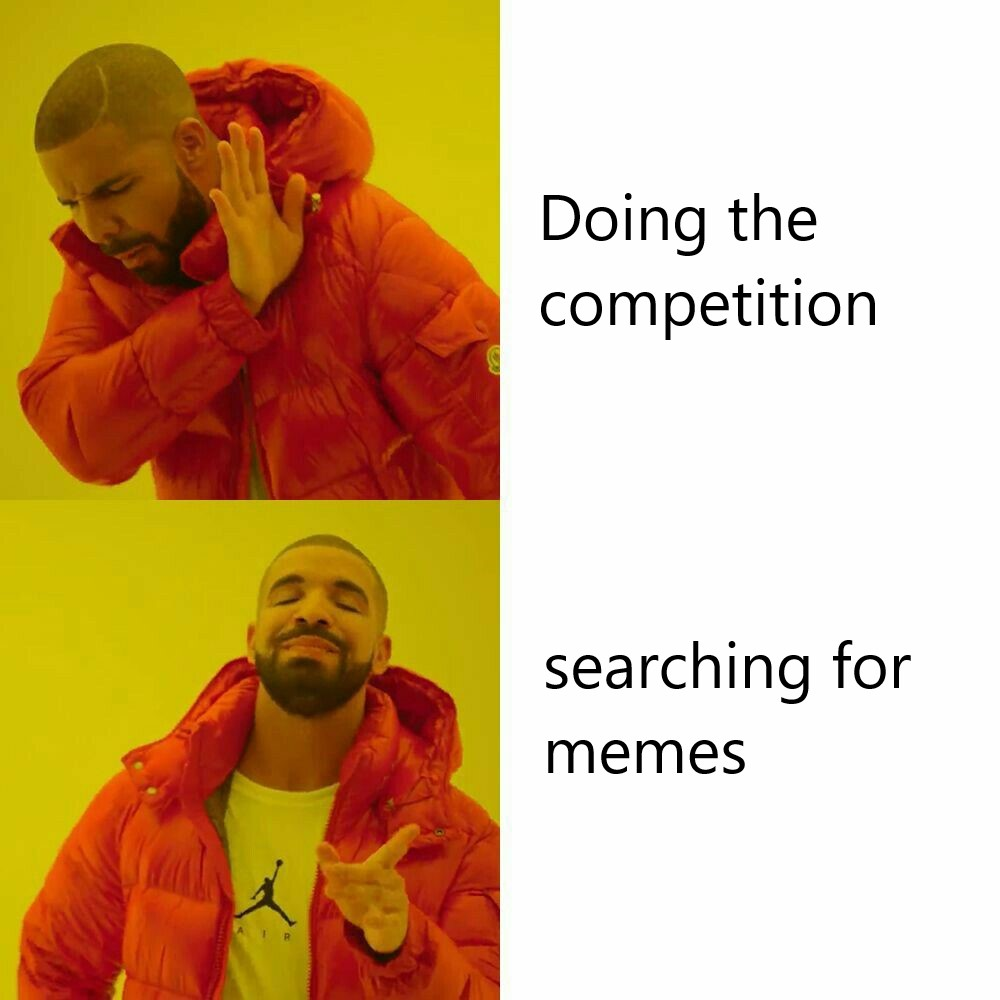